In [16]:
%load_ext autoreload
%autoreload 2


import json
import os
import matplotlib.pyplot as plt

from ScheduleSampler import ScheduleSampler, activity_map, start_times

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


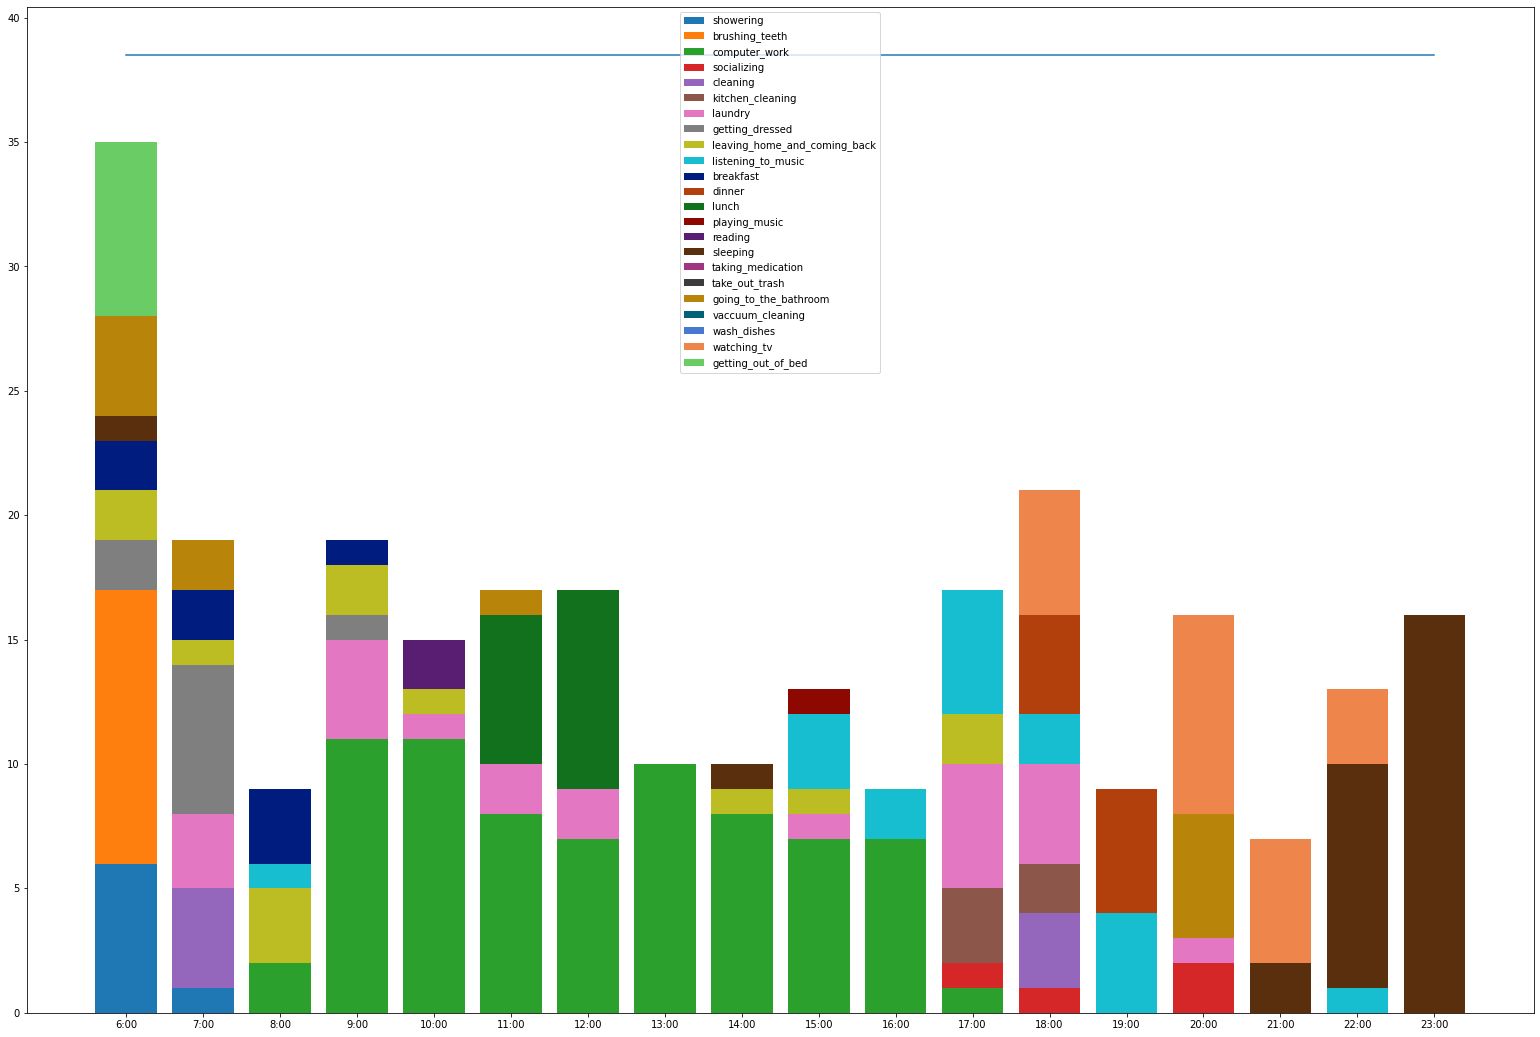

In [35]:
sampler = ScheduleSampler(filter_num=5, idle_sampling_factor=1.1)

import seaborn as sns
clrs = sns.color_palette()[:-1]+sns.color_palette("dark")[:-1]+sns.color_palette("muted")[:-1]
fig, ax = plt.subplots()
fig.set_size_inches(27, 18.5)
i=0
for act, freq in sampler.activity_histograms.items():
    if act is None:
        continue
    d = [sampler.activity_threshold[st][act][1] - sampler.activity_threshold[st][act][0] for st in start_times]
    ax.bar(freq.keys(), d, label=act, bottom=[sampler.activity_threshold[st][act][0] for st in start_times], color=clrs[i])
    i += 1
ax.plot([start_times[0], start_times[-1]], [sampler.sampling_range,sampler.sampling_range])
ax.set_xticks(start_times)
ax.set_xticklabels([str(s)+':00' for s in start_times])
plt.legend()
plt.show()

In [18]:
t = 7.5 * 60
print(sampler(t))


showering


In [25]:
print(sampler.sample_time_for('breakfast'))

22.67252775810085
